In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
%matplotlib inline

In [64]:
file_names = []
for root, dirs, files in os.walk('tb_files/MC-V1-2018/for-chart'):
    for fname in files:
        if fname == 's-230k_e-4': # without epoch 4
            continue
        full_fname = os.path.join(root, fname)
        file_names.append({'loc':full_fname, 'type':fname})

In [65]:
file_names[0]['type']

's-090k_e-3'

In [66]:
#event_path = 'tb_files/MC-V1-2018/steps-090k/events.out.tfevents.1573531925.5cae4c63838d'

In [67]:
datas = []
step, loss, eval_acc = None, None, None
for file_name in file_names:
    for event in tf.train.summary_iterator(file_name['loc']):
        for value in event.summary.value:
            if value.tag == 'eval_acc':
                if value.HasField('simple_value'):
                    step = event.step
                    eval_acc = value.simple_value
            if value.tag == 'loss':
                if value.HasField('simple_value'):
                    loss = value.simple_value
            
            if step != None and loss != None and eval_acc != None:
                datas.append({'type':file_name['type'], 'step':step, 'loss':loss, 'eval_acc':eval_acc})
                step, loss, eval_acc = None, None, None

In [68]:
len(datas)

148

In [69]:
df = pd.DataFrame(datas)

In [70]:
df.head()

,type,step,loss,eval_acc
0,s-090k_e-3,1000,2.526581,0.4289
1,s-090k_e-3,2000,1.775786,0.5163
2,s-090k_e-3,3000,1.604802,0.5400
3,s-090k_e-3,4000,1.495037,0.5622
4,s-090k_e-3,5000,1.468318,0.5613


In [71]:
df.groupby('type')['eval_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
s-090k_e-3,37.0,0.581857,0.032641,0.4289,0.5716,0.5925,0.6008,0.6056
s-190k_e-3,37.0,0.592489,0.027470,0.4556,0.5892,0.6012,0.6081,0.6131
s-230k_e-3,37.0,0.594649,0.026948,0.4624,0.5880,0.6025,0.6098,0.6142
s-310k_e-3,37.0,0.595286,0.026252,0.4628,0.5914,0.6033,0.6096,0.6135


Text(0, 0.5, 'eval_acc')

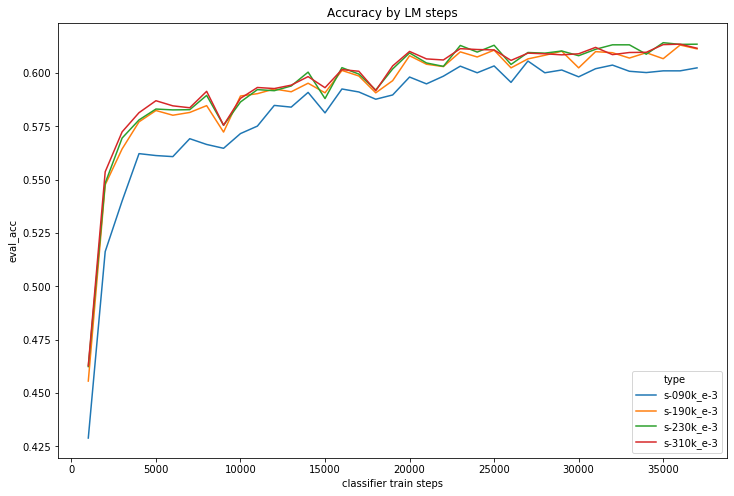

In [86]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='step', y='eval_acc', data=df, hue='type')
ax.set_title('Accuracy by LM steps')
plt.xlabel('classifier train steps')
plt.ylabel('eval_acc')

Text(0, 0.5, 'density')

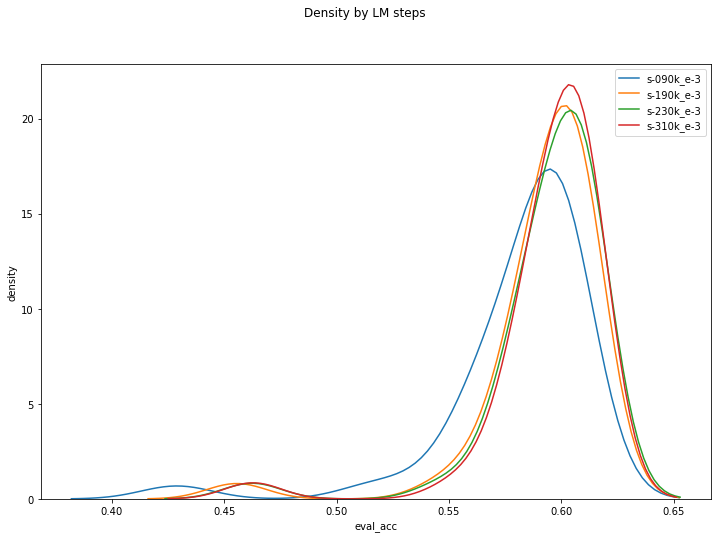

In [85]:
plt.figure(figsize=(12,8))
df.groupby('type')['eval_acc'].apply(lambda x: sns.kdeplot(data=x, legend=True))
plt.suptitle('Density by LM steps')
plt.xlabel('eval_acc')
plt.ylabel('density')

Text(0.5, 1.0, 'Box-plot by LM steps')

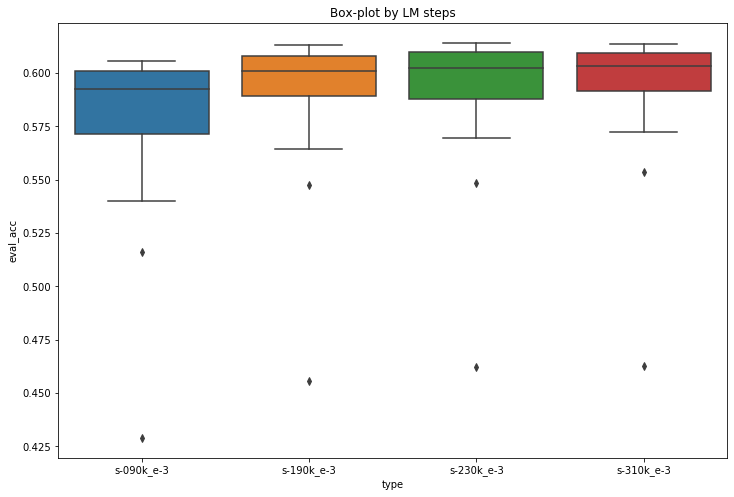

In [76]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='type', y='eval_acc', data=df)
ax.set_title('Box-plot by LM steps')